# **Movie Recommender System using NLP**

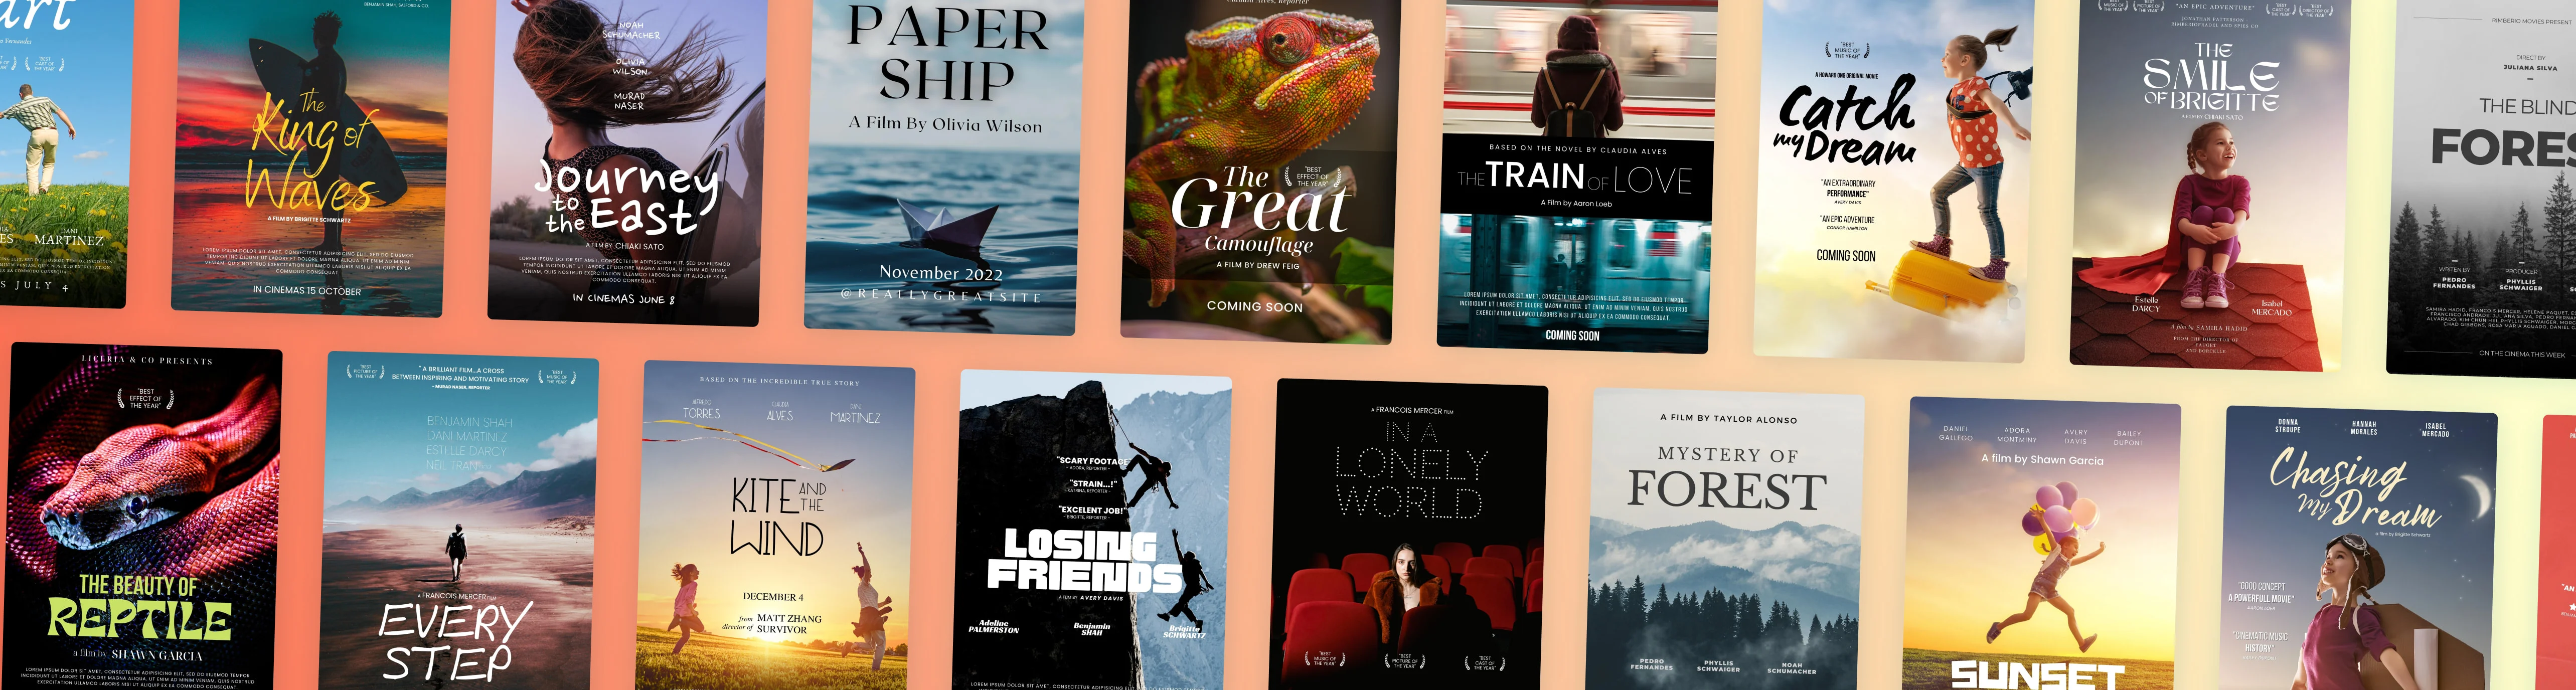



In [ ]:
import pandas as pd
import re
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
df=pd.read_csv('movieDatasetSample.csv',index_col=False)

In [ ]:
df.head(10)

In [ ]:
list(df.columns)

In [ ]:
df=df[['Title','Overview','Genre']]

## **Stemming** is a technique used to convert a word to it's base form. PorterStemmer is one of the most widely used Stemming algorithm.

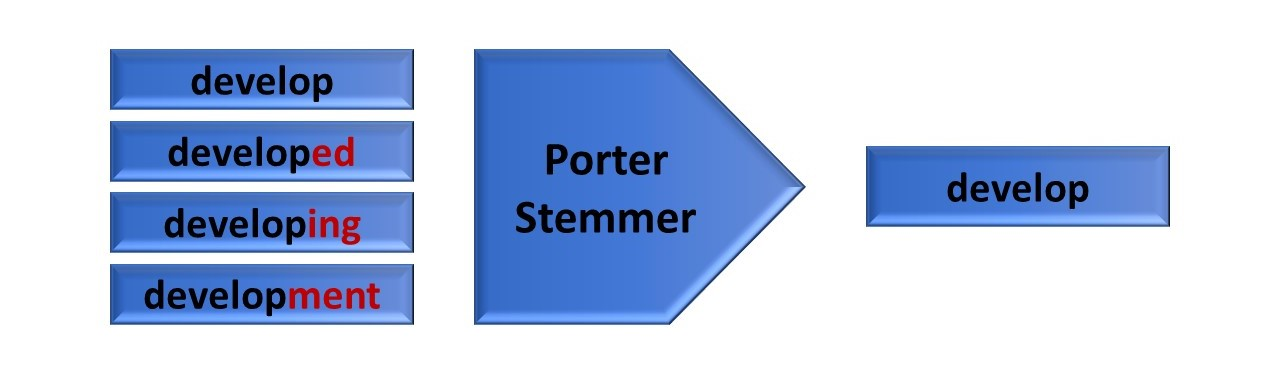

In [ ]:
ps=PorterStemmer()
for word in ['develop','developed','developing','development']:
  print(word,"\t==>  ",ps.stem(word))

In [ ]:
ps=PorterStemmer()

def extractTitleandOverview(text):
  output=''
  text=text.lower()
  text=re.sub(r'[^a-z ]', "", text)                                             # keeping only alphabets
  if type(text) is str:
    for word in text.split(" "):                                     
      output+=(ps.stem(word))+' '                                               # Stemming
    output = re.sub(r'[ ]+', " ", output)                                       # removing multiple spaces
    return output
  else:
    return text

def extractGenre(text):
  text=text.lower()
  output=re.sub(r'[^a-z ]', " ", text)
  output=re.sub(r'[ ]+', " ", output)
  return output 

In [ ]:
df['TitleProcessed'] = df['Title'].apply(extractTitleandOverview)
df['OverviewProcessed'] = df['Overview'].apply(extractTitleandOverview)
df['GenreProcessed'] = df['Genre'].apply(extractGenre)

In [ ]:
df.head(10)

### **Title**
*   **Before:**  American History X
*   **After:**  american histori x

### **Overview**
*   **Before:**  Derek Vineyard is paroled after serving 3 years in prison for killing two African-American men.
*   **After:**  derek vineyard is parol after serv year in prison for kill two african american men

### **Genre**
*   **Before:**  ['Drama']
*   **After:**  drama

In [ ]:
df=df[['Title','TitleProcessed','OverviewProcessed','GenreProcessed']]

In [ ]:
df=df.dropna()

In [ ]:
df.head(10)

## **Count Vectorizer** is a technique used to convert a collection of text to a matrix of word counts.

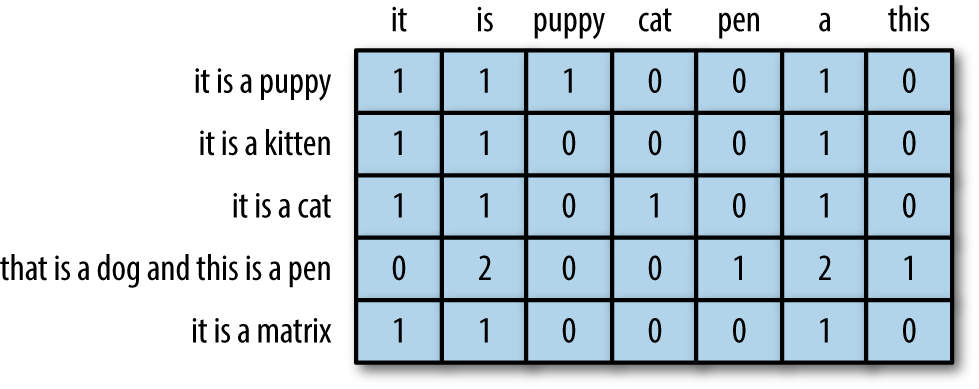

In [ ]:
cvTitle = CountVectorizer(stop_words='english')                                 # Selecting all words from Title
cvOverview = CountVectorizer(max_features=3257,stop_words='english')            # Selecting most occured 3257 words from Overview
cvGenre = CountVectorizer(stop_words='english')                                 # Selecting all words from Genre

vectorTitle = cvTitle.fit_transform(df['TitleProcessed'])
vectorOverview = cvOverview.fit_transform(df['OverviewProcessed'])
vectorGenre = cvGenre.fit_transform(df['GenreProcessed'])

In [ ]:
print("vectorTitle\t: ",vectorTitle.shape)
print("vectorOverview\t: ",vectorOverview.shape)
print("vectorGenre\t: ",vectorGenre.shape)

## **hstack** is used to stack sparse matrices horizontally (column wise).

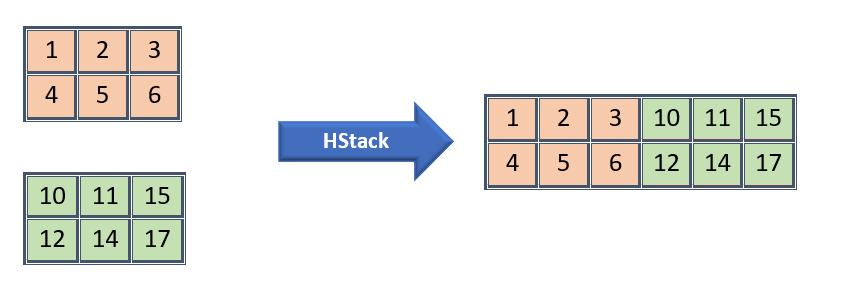

In [ ]:
vectorCombined = hstack([vectorTitle, vectorOverview, vectorGenre]).toarray()   # Stacking arrays column wise

In [ ]:
print("vectorCombined\t: ",vectorCombined.shape)

In [ ]:
BagOfWords = list(cvTitle.get_feature_names_out()) + list(cvOverview.get_feature_names_out()) + list(cvGenre.get_feature_names_out())

In [ ]:
for eachWord in ['a','is','it','movie','action']:
  print(eachWord,"\t:  ",eachWord in BagOfWords)

In [ ]:
for i in range(0,len(BagOfWords),20):
  print(" ".join(BagOfWords[i:i+20]))

## **Cosine Similarity** is defined as the cosine of the angle between two vectors, i.e, the dot product of the vectors divided by the product of their lengths.

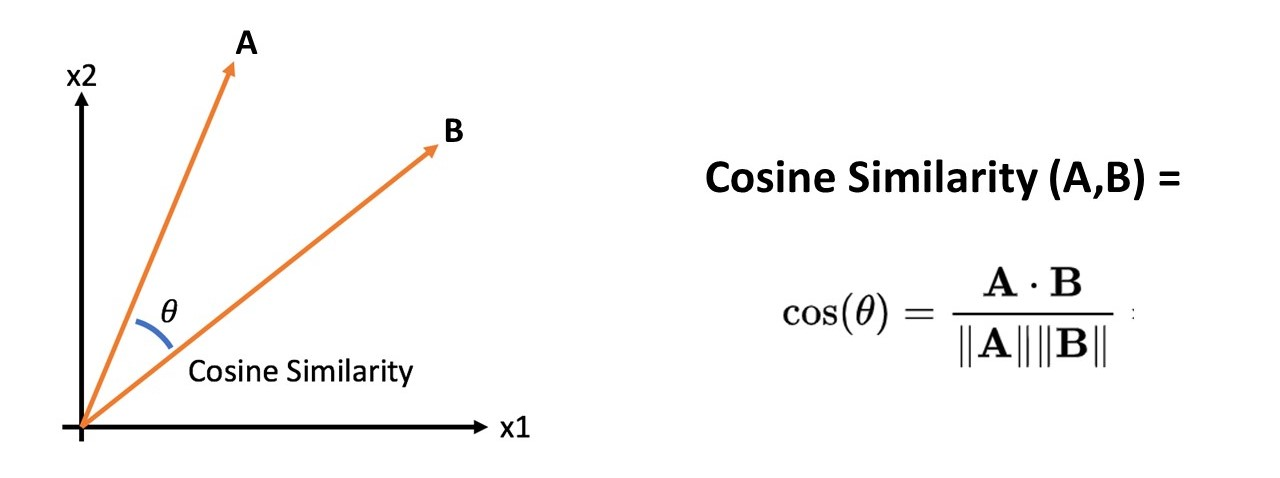

In [ ]:
similarity = cosine_similarity(vectorCombined)

In [ ]:
print("similarity\t: ",similarity.shape)  

In [ ]:
MovieName="Spider-Man: No Way Home"

index = df[df['Title'] == MovieName].index[0]
# Sorting the similarity array based on Similarity value in descending order
distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])

In [ ]:
similarity[index]

In [ ]:
list(enumerate(similarity[index]))

In [ ]:
sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])

In [ ]:
movies=pd.DataFrame()
for i in distances[1:6]:
  movies = movies.append({'Title' : df.loc[i[0], 'Title'], 'Similarity' : round(i[1],3)},ignore_index = True)

print(movies)

### ***Sample Movie names for testing:***

1.   **Spider-Man: No Way Home** 
2.   **The Notebook**
3.   **Beauty and the Beast**

In [ ]:
def recommendMovie(movie):
  movies=pd.DataFrame()
  index = df[df['Title'] == movie].index[0]
  distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
  for i in distances[1:6]:
    movies = movies.append({'Title' : df.loc[i[0], 'Title'], 'Similarity' : round(i[1],3)},ignore_index = True)
  return movies

In [ ]:
recommendMovie("Spider-Man: No Way Home")

In [ ]:
recommendMovie("The Notebook")

In [ ]:
recommendMovie("Beauty and the Beast")